In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

!nvidia-smi

Wed Jun 19 18:21:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:19:00.0 Off |                  Off |
| 50%   73C    P2            254W /  450W |   19913MiB /  24564MiB |     82%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

pipe.load_textual_inversion('/data/sd-results/shark_inversion_prior/shark_inversion_prior.safetensors', token="mychar4")

print('done')

/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


done


/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/diffusers/configuration_utils.py:139: FutureWarning: Accessing config attribute `use_karras_sigmas` directly via 'DPMSolverSDEScheduler' object attribute is deprecated. Please access 'use_karras_sigmas' over 'DPMSolverSDEScheduler's config object instead, e.g. 'scheduler.config.use_karras_sigmas'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


 90%|██████████████████████████████████████▋    | 18/20 [00:05<00:00,  3.51it/s]/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torchsde/_brownian/brownian_interval.py:599: UserWarning: Should have ta>=t0 but got ta=0.0291675366461277 and t0=0.029168.
  warnings.warn(f"Should have ta>=t0 but got ta={ta} and t0={self._start}.")
100%|███████████████████████████████████████████| 20/20 [00:05<00:00,  3.59it/s]


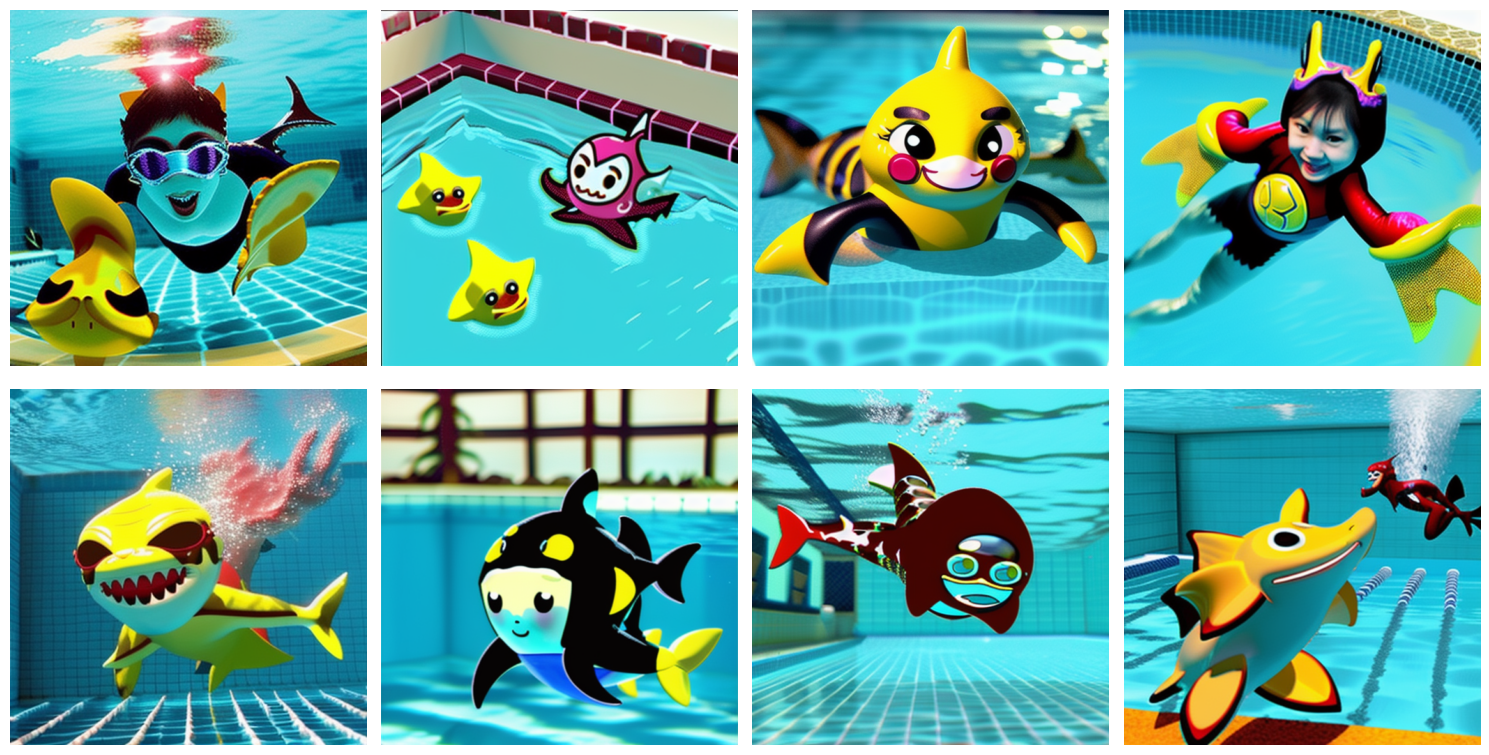

In [6]:
prompt = "mychar4, swimming in the pool"

images = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
         num_images_per_prompt=8
        ).images


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
